In [1]:
import pandas as pd
import numpy as np
import datetime

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel("D:/github/Etape/toutReponse.xlsx")

In [5]:
df = df.drop("id", axis =1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dispositif     144 non-null    object
 1   site           138 non-null    object
 2   debut          144 non-null    object
 3   fin            145 non-null    object
 4   statue         147 non-null    object
 5   branche        147 non-null    object
 6   fin1           4 non-null      object
 7   fin2           4 non-null      object
 8   fin3           4 non-null      object
 9   fin4           4 non-null      object
 10  fin5           4 non-null      object
 11  intType        33 non-null     object
 12  inter1         34 non-null     object
 13  inter2         33 non-null     object
 14  inter3         33 non-null     object
 15  inter4         33 non-null     object
 16  intForDis      34 non-null     object
 17  inter5         14 non-null     object
 18  intRisqS       33 non-null    

In [7]:
df.isnull().sum()
# pd.isnull(df).sum()
# df.dropna(inplace=True)
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
#df.isnull().sum().sum()

dispositif         3
site               9
debut              3
fin                2
statue             0
branche            0
fin1             143
fin2             143
fin3             143
fin4             143
fin5             143
intType          114
inter1           113
inter2           114
inter3           114
inter4           114
intForDis        113
inter5           133
intRisqS         114
intRisqH         130
intRisqJ         130
intRisqEn        130
intRisqEc        130
preUsager        132
pre1             132
pre2             132
pre3             132
pre4             132
pre5             132
pre6             132
ben1              54
ben2              54
ben3              54
ben4              53
ben5              54
ben6              55
ben7             115
comment           94
proposition      127
register_date      0
dtype: int64

In [8]:
df[df.dispositif.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
18,NaN,Vire,2021-01-11,2021-04-23,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:46:10
30,NaN,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54


In [9]:
df.debut.replace(to_replace = "212020-01-08", value = "2021-01-08", inplace=True)
#df[df.fin == "0021-05-03"]
df.fin.replace(to_replace = "0021-05-03", value = "2021-05-03", inplace=True)

In [10]:
df.debut = pd.to_datetime(df.debut, format = "%Y-%m-%d")
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [11]:
df["jour"] = df.fin-df.debut

In [12]:
df["year"] = df["fin"].dt.year
df["month"] = df["fin"].dt.month
df["day"] = df["fin"].dt.day

In [13]:
df.columns

Index(['dispositif', 'site', 'debut', 'fin', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date', 'jour', 'year', 'month',
       'day'],
      dtype='object')

In [14]:
df = df[['dispositif', 'site', 'debut', 'fin', 'year', 'month', 'day', 'jour', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date']]

In [15]:
df["period"] = df["month"] >= 7
df["period"] = df["period"] + 1

In [16]:
df.period.value_counts()

1    75
2    72
Name: period, dtype: int64

In [17]:
df[['dispositif', 'site', 'debut', 'fin', 'period', 'year', 'month', 'day', 'jour',
       'statue', 'branche', 'fin1', 'fin2', 'fin3', 'fin4', 'fin5', 'intType',
       'inter1', 'inter2', 'inter3', 'inter4', 'intForDis', 'inter5',
       'intRisqS', 'intRisqH', 'intRisqJ', 'intRisqEn', 'intRisqEc',
       'preUsager', 'pre1', 'pre2', 'pre3', 'pre4', 'pre5', 'pre6', 'ben1',
       'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7', 'comment',
       'proposition', 'register_date']].head()

,dispositif,site,debut,fin,period,year,month,day,jour,statue,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,Bilan de competences,Avranches,2021-02-03,2021-06-04,1,2021.0,6.0,4.0,121 days,beneficiaire,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,Bilan de competences,Vire,2021-02-23,2021-06-08,1,2021.0,6.0,8.0,105 days,prescripteur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,Bilan de competences,Vire,2021-02-23,2021-06-08,1,2021.0,6.0,8.0,105 days,beneficiaire,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,Bilan de competences,Vire,2021-02-23,2021-06-08,1,2021.0,6.0,8.0,105 days,intervenant-e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,Bilan de competences,Vire,2021-01-08,2021-05-03,1,2021.0,5.0,3.0,115 days,prescripteur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [18]:
map_dict = {"Remobilisation" : "Remob", "Garantie Departementale d'Activite (GAD)" : "GDA", 
            "Primo insertion sociale":"PIS", "Primo insertion professionnelle":"PIP", 
            "Actions courtes type 'marchons pour ... '":"AC", "Formation civique OFII":"FCO", 
            "Jardins partages": "JP", "#avenir":"#avenir", "Accompagnement a la preparation de la VAE":"APV", 
            "Bilan de competences":"BC","Reseau de soutien et de recherche d'emploi":"RSRE", 
            "Prestations specifiques":"PS", "Accompagnement des porteurs de projets":"APP", 
            "Formation des acteurs":"FA", "Interventions dans les centres de formation":"ICF", 
            "Interventions scolaires et universitaires":"ISU", "La dynimique de l'emploi":"DE", 
            "Présentation du Harcelement":"PH"}

In [19]:
df.dispositif = df.dispositif.map(map_dict)

In [20]:
df.head()

,dispositif,site,debut,fin,year,month,day,jour,statue,branche,...,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date,period
0,BC,Avranches,2021-02-03,2021-06-04,2021.0,6.0,4.0,121 days,beneficiaire,beneficiaire,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16,1
1,BC,Vire,2021-02-23,2021-06-08,2021.0,6.0,8.0,105 days,prescripteur,prescripteur,...,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15,1
2,BC,Vire,2021-02-23,2021-06-08,2021.0,6.0,8.0,105 days,beneficiaire,beneficiaire,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08,1
3,BC,Vire,2021-02-23,2021-06-08,2021.0,6.0,8.0,105 days,intervenant-e,intervenant-e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35,1
4,BC,Vire,2021-01-08,2021-05-03,2021.0,5.0,3.0,115 days,prescripteur,prescripteur,...,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50,1


## Analyse de dispositif

### Nombre total de dispositif sont:

BC       57
PIP      28
PIS      23
PS       15
DE        9
FA        4
GDA       2
AC        2
ISU       2
PH        1
Remob     1
Name: dispositif, dtype: int64


Text(0, 0.5, 'Nombre')

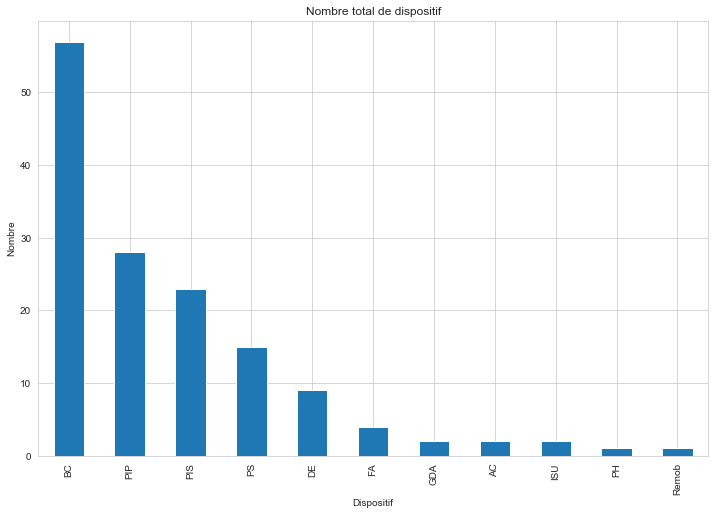

In [101]:
print(df.dispositif.value_counts())
dispTotal = df.dispositif.value_counts().plot(kind="bar", title="Nombre total de dispositif", figsize=(12,8))
dispTotal.set_xlabel("Dispositif")
dispTotal.set_ylabel("Nombre")

### Taux de pourcentage de dispositif sont:

BC       0.40
PIP      0.19
PIS      0.16
PS       0.10
DE       0.06
FA       0.03
GDA      0.01
AC       0.01
ISU      0.01
PH       0.01
Remob    0.01
Name: dispositif, dtype: float64


Text(0, 0.5, 'Taux')

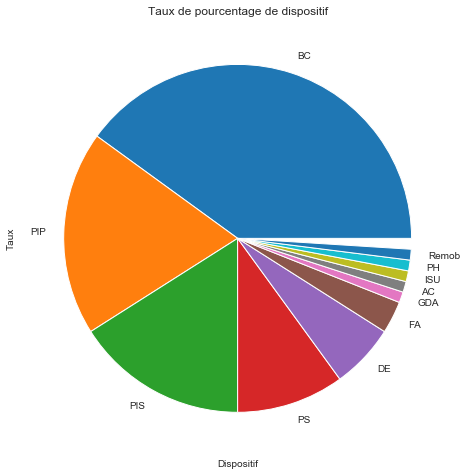

In [99]:
print(round((df.dispositif.value_counts(normalize=True)), 2))
tauxDisp = round(df.dispositif.value_counts(normalize=True), 2).plot(kind="pie", figsize = (12,8),title="Taux de pourcentage de dispositif" )
tauxDisp.set_xlabel("Dispositif")
tauxDisp.set_ylabel("Taux")

In [181]:
dfFin = df[df.statue =="financeur"]

In [182]:
dfFin

,dispositif,site,debut,fin,jour,period,statue,branche,fin1,fin2,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,146 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,0 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,60 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02
145,FA,Vire,2021-08-30,2021-08-30,0 days,Jan-Jul,financeur,financeur,Très satisfaisant,Très satisfaisant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30 14:03:26


In [40]:
dfFin.drop(columns=['intType', 'inter1', 'inter2', 'inter3','inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4','pre5', 'pre6', 
                    'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7'], axis = 1, inplace = True)

In [41]:
dfFin

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,fin5,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02


In [42]:
dfFin.rename(columns={"fin1":"Disponibilité", "fin2": "Administratif", "fin3": "Respect", "fin4":"Cohérence", "fin5": "Supports"}, inplace=True)

In [43]:
dfFin

,dispositif,site,debut,fin,statue,branche,Disponibilité,Administratif,Respect,Cohérence,Supports,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02


In [20]:
#map_dict_fin = {"Très satisfaisant":5, "Satisfaisant":4, "Moyennement satisfaisant":3, "Pas satisfaisant":2, "Non concerné":1}

In [21]:
#dfFin.Disponibilité = dfFin.Disponibilité.map(map_dict_fin)
#dfFin.Administratif = dfFin.Administratif.map(map_dict_fin)
#dfFin.Respect = dfFin.Respect.map(map_dict_fin)
#dfFin.Cohérence = dfFin.Cohérence.map(map_dict_fin)
#dfFin.Supports = dfFin.Supports.map(map_dict_fin)

In [59]:
dfFin = dfFin[['dispositif', 'site', 'debut', 'fin', 'jour', 'statue', 'branche', 'Disponibilité',
       'Administratif', 'Respect', 'Cohérence', 'Supports', 'comment', 'proposition', 'register_date']]

In [60]:
dfFin

,dispositif,site,debut,fin,jour,statue,branche,Disponibilité,Administratif,Respect,Cohérence,Supports,comment,proposition,register_date
99,PIP,Argentan,2021-01-20,2021-06-15,146 days,financeur,financeur,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Très satisfaisant,La prestation correspond aux attentes du marché.,NaN,2021-06-25 08:58:23
108,PH,NaN,2020-12-01,2020-12-01,0 days,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,renouvellement de cette action aupres des 6ème...,NaN,2021-06-30 10:32:36
127,PS,Bayeux,2021-05-17,2021-07-16,60 days,financeur,financeur,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,Accès à l'emploi pour 5p./10 soit 50% : 2 ACI...,Travailler sur la mixité des emplois. Elargir ...,2021-07-16 14:39:02


### Les Avarages Pour Financeur

#### Question 1: Disponibilité et écoute de votre interlocuteur

Le nombre total de réponses sur Disponibilité est : Très satisfaisant    3
Name: Disponibilité, dtype: int64
Pourcentage pour Disponibilité est:  Très satisfaisant    100.0
Name: Disponibilité, dtype: float64


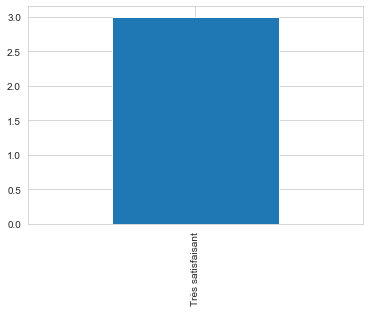

In [61]:
print("Le nombre total de réponses sur Disponibilité est :", dfFin["Disponibilité"].value_counts())
print("Pourcentage pour Disponibilité est: ", round(dfFin["Disponibilité"].value_counts(normalize=True)*100,1))
dfFin.Disponibilité.value_counts().plot(kind="bar")

#### Question 2: Suivi administratif de la prestation (convention, attestations, facturation…)

Le nombre total de réponses sur Administratif est : Très satisfaisant    3
Name: Administratif, dtype: int64
Avarage pour Administratif est:  Très satisfaisant    100.0
Name: Administratif, dtype: float64


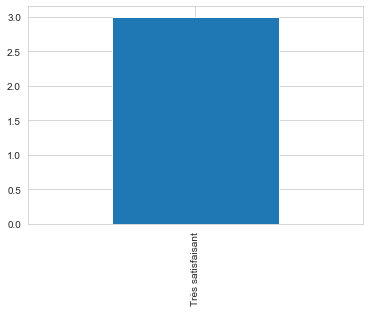

In [50]:
print("Le nombre total de réponses sur Administratif est :", dfFin["Administratif"].value_counts())
print("Avarage pour Administratif est: ", round(dfFin["Administratif"].value_counts(normalize=True)*100,1))
dfFin.Administratif.value_counts().plot(kind="bar")

#### Question 3: Respect des engagements pris

Le nombre total de réponses sur Respect est : Très satisfaisant    2
Satisfaisant         1
Name: Respect, dtype: int64
Avarage pour Respect est:  Très satisfaisant    66.7
Satisfaisant         33.3
Name: Respect, dtype: float64


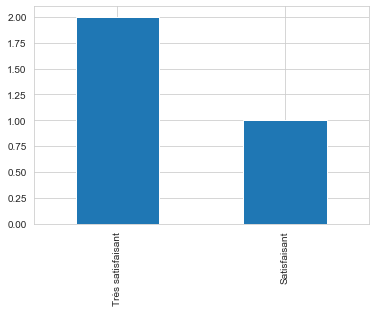

In [51]:
print("Le nombre total de réponses sur Respect est :", dfFin["Respect"].value_counts())
print("Avarage pour Respect est: ", round(dfFin["Respect"].value_counts(normalize=True)*100,1))
dfFin.Respect.value_counts().plot(kind="bar")

#### Question 4: Cohérence des objectifs et des contenus au regard de vos besoins

Le nombre total de réponses sur Cohérence est : Satisfaisant         2
Très satisfaisant    1
Name: Cohérence, dtype: int64
Avarage pour Cohérence est:  Satisfaisant         66.7
Très satisfaisant    33.3
Name: Cohérence, dtype: float64


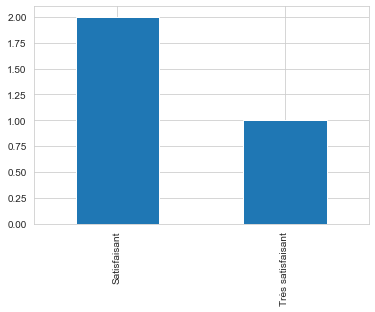

In [52]:
print("Le nombre total de réponses sur Cohérence est :", dfFin["Cohérence"].value_counts())
print("Avarage pour Cohérence est: ", round(dfFin["Cohérence"].value_counts(normalize=True)*100,1))
dfFin.Cohérence.value_counts().plot(kind="bar")

#### Question 5: Supports et moyens pédagogiques mis en œuvre au regard de vos attentes

Le nombre total de réponses sur Supports est : Très satisfaisant    3
Name: Supports, dtype: int64
Avarage pour Supports est:  Très satisfaisant    100.0
Name: Supports, dtype: float64


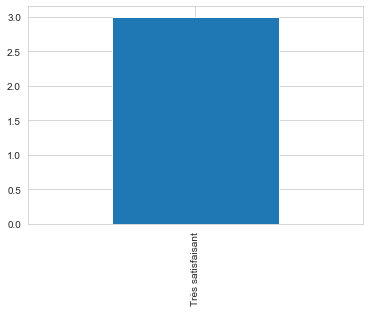

In [53]:
print("Le nombre total de réponses sur Supports est :", dfFin["Supports"].value_counts())
print("Avarage pour Supports est: ", round(dfFin["Supports"].value_counts(normalize=True)*100,1))
dfFin.Supports.value_counts().plot(kind="bar")

In [ ]:
print(round(dfFin["Disponibilité"].value_counts(normalize=True),1))
print(round(dfFin["Administratif"].value_counts(normalize=True),1))
print(round(dfFin["Respect"].value_counts(normalize=True),1))
print(round(dfFin["Cohérence"].value_counts(normalize=True),1))
print(round(dfFin["Supports"].value_counts(normalize=True),1))

In [25]:

print("Avarage pour Administratif est: ", round(dfFin.Administratif.mean(), 1))
print("Avarage pour Respect est: ", round(dfFin.Respect.mean(),1))
print("Avarage pour Cohérence est: ", round(dfFin.Cohérence.mean(), 1))
print("Avarage pour Supports est: ", round(dfFin.Supports.mean(), 1))

Avarage pour Disponibilité est:  5.0
Avarage pour Administratif est:  5.0
Avarage pour Respect est:  4.7
Avarage pour Cohérence est:  4.3
Avarage pour Supports est:  5.0


In [ ]:
print(dfFin["Administratif"].value_counts())
print(dfFin["Respect"].value_counts())
print(dfFin["Cohérence"].value_counts())
print(dfFin["Supports"].value_counts())

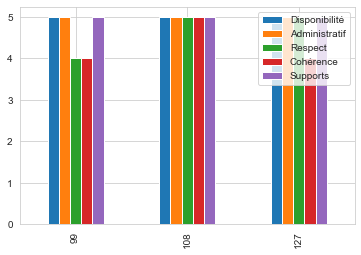

In [26]:
dfFin.plot.bar()

In [27]:
dfFin.Disponibilité.value_counts()

5    3
Name: Disponibilité, dtype: int64

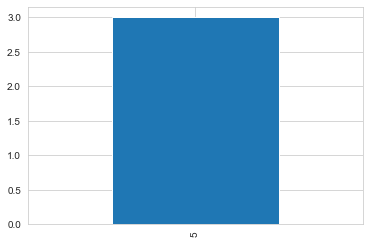

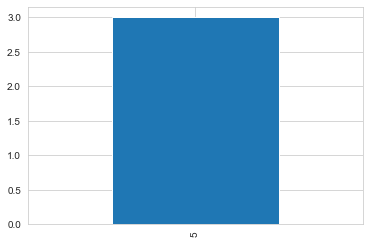

In [29]:
dfFin.Administratif.value_counts().plot(kind="bar")

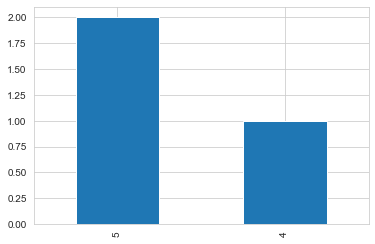

In [30]:
dfFin.Respect.value_counts().plot(kind="bar")

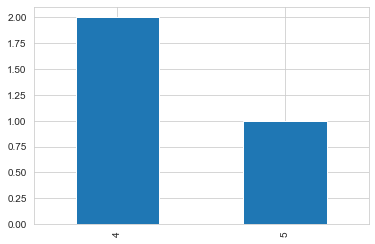

In [31]:
dfFin.Cohérence.value_counts().plot(kind="bar")

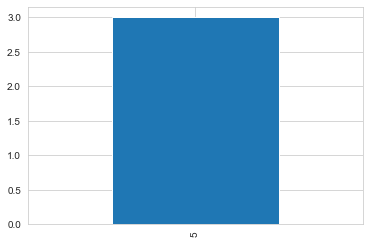

In [32]:
dfFin.Supports.value_counts().plot(kind="bar")

In [29]:
dfFin.head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,BC,Avranches,2021-02-03,2021-06-04,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,BC,Vire,2021-02-23,2021-06-08,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,BC,Vire,2021-02-23,2021-06-08,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,BC,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50
5,BC,Vire,2021-01-08,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,Aucun,NaN,2021-06-22 12:24:59
6,BC,Vire,212020-01-08,2021-02-03,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:28:24
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
8,BC,Vire,2021-01-11,2021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:30:56
9,BC,Argentan,2021-02-03,2021-05-20,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Très satisfaite dans la globalité de ma prise ...,NaN,2021-06-22 12:32:37


In [23]:
df.isnull().sum()
# pd.isnull(df).sum()
# df.dropna(inplace=True)
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

dispositif         3
site               9
debut              3
fin                2
statue             0
branche            0
fin1             139
fin2             139
fin3             139
fin4             139
fin5             139
intType          110
inter1           109
inter2           110
inter3           110
inter4           110
intForDis        109
inter5           128
intRisqS         110
intRisqH         126
intRisqJ         126
intRisqEn        126
intRisqEc        126
preUsager        127
pre1             127
pre2             127
pre3             127
pre4             127
pre5             127
pre6             127
ben1              52
ben2              52
ben3              52
ben4              51
ben5              52
ben6              53
ben7             110
comment           90
proposition      123
register_date      0
dtype: int64

In [244]:
df.isnull().sum().sum()

3286

In [10]:
df[df.dispositif.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
7,NaN,Vire,2021-02-11,2021-05-03,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Satisfaisant,Très satisfaisant,NaN,NaN,+ modernisation des test d'aptitudes +++,2021-06-22 12:30:05
18,NaN,Vire,2021-01-11,2021-04-23,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:46:10
30,NaN,NaN,2020-12-02,2021-03-24,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 13:01:54


In [11]:
df.site.fillna(method = "pad", inplace = True)

In [12]:
df[df.debut.isnull()==True]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
48,Bilan de competences,Vire,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,2021-06-22 14:12:17
54,Bilan de competences,Saint-Lo,NaN,NaN,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,NaN,2021-06-23 09:16:58
104,Primo insertion professionnelle,Argentan,NaN,2021-06-15,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,Satisfaisant,NaN,NaN,NaN,2021-06-25 09:05:06


In [334]:
df.head()

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,BC,Avranches,2021-02-03,2021-06-04,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,BC,Vire,2021-02-23,2021-06-08,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,BC,Vire,2021-02-23,2021-06-08,beneficiaire,beneficiaire,NaN,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,BC,Vire,2021-02-23,2021-06-08,intervenant-e,intervenant-e,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,BC,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [335]:
df.isnull().sum()

dispositif         0
site               0
debut              2
fin                2
statue             0
branche            0
fin1             125
fin2             125
fin3             125
fin4             125
fin5             125
intType           98
inter1            97
inter2            98
inter3            98
inter4            98
intForDis         97
inter5           114
intRisqS          98
intRisqH         114
intRisqJ         114
intRisqEn        114
intRisqEc        114
preUsager        115
pre1             115
pre2             115
pre3             115
pre4             115
pre5             115
pre6             115
ben1              48
ben2              48
ben3              48
ben4              47
ben5              48
ben6              49
ben7              99
comment           86
proposition      112
register_date      0
dtype: int64

In [336]:
df.groupby("dispositif")["statue"].value_counts()

dispositif  statue       
AC          intervenant-e     1
BC          beneficiaire     23
            intervenant-e    21
            prescripteur     10
DE          beneficiaire      9
GAD         beneficiaire      2
ISU         prescripteur      1
PH          financeur         1
PIP         beneficiaire     26
            financeur         1
            prescripteur      1
PIS         beneficiaire     16
            intervenant-e     6
PS          beneficiaire      4
            intervenant-e     3
            financeur         1
            prescripteur      1
Remob       beneficiaire      1
Name: statue, dtype: int64

In [342]:
df.debut.replace(to_replace = "212020-01-08", value = "2021-01-08", inplace=True)

In [343]:
df.debut = pd.to_datetime(df.debut, format = "%Y-%m-%d")
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [338]:
df[df.fin == "0021-05-03"]

,dispositif,site,debut,fin,statue,branche,fin1,fin2,fin3,fin4,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
4,BC,Vire,2021-01-08,0021-05-03,prescripteur,prescripteur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [339]:
df.fin.replace(to_replace = "0021-05-03", value = "2021-05-03", inplace=True)

In [340]:
df.fin = pd.to_datetime(df.fin, format = "%Y-%m-%d")

In [344]:
df["jour"] = df.fin-df.debut

In [345]:
df.jour

0     121 days
1     105 days
2     105 days
3     105 days
4     115 days
        ...   
123    60 days
124    60 days
125    60 days
126    60 days
127    60 days
Name: jour, Length: 128, dtype: timedelta64[ns]

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   dispositif     128 non-null    object         
 1   site           128 non-null    object         
 2   debut          126 non-null    datetime64[ns] 
 3   fin            126 non-null    datetime64[ns] 
 4   statue         128 non-null    object         
 5   branche        128 non-null    object         
 6   fin1           3 non-null      object         
 7   fin2           3 non-null      object         
 8   fin3           3 non-null      object         
 9   fin4           3 non-null      object         
 10  fin5           3 non-null      object         
 11  intType        30 non-null     object         
 12  inter1         31 non-null     object         
 13  inter2         30 non-null     object         
 14  inter3         30 non-null     object         
 15  inter4

In [347]:
df.columns

Index(['dispositif', 'site', 'debut', 'fin', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date', 'jour'],
      dtype='object')

In [348]:
df = df[['dispositif', 'site', 'debut', 'fin', 'jour', 'statue', 'branche', 'fin1',
       'fin2', 'fin3', 'fin4', 'fin5', 'intType', 'inter1', 'inter2', 'inter3',
       'inter4', 'intForDis', 'inter5', 'intRisqS', 'intRisqH', 'intRisqJ',
       'intRisqEn', 'intRisqEc', 'preUsager', 'pre1', 'pre2', 'pre3', 'pre4',
       'pre5', 'pre6', 'ben1', 'ben2', 'ben3', 'ben4', 'ben5', 'ben6', 'ben7',
       'comment', 'proposition', 'register_date']]

In [349]:
df.head()

,dispositif,site,debut,fin,jour,statue,branche,fin1,fin2,fin3,...,ben1,ben2,ben3,ben4,ben5,ben6,ben7,comment,proposition,register_date
0,BC,Avranches,2021-02-03,2021-06-04,121 days,beneficiaire,beneficiaire,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Peu satisfaisant,Très satisfaisant,NaN,Apprécié les moyens mit à dispositions même si...,Test plus précis a fin de cibler davantage 2 v...,2021-06-22 12:05:16
1,BC,Vire,2021-02-23,2021-06-08,105 days,prescripteur,prescripteur,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J'ai été ravie de la prise en charge de mon bi...,NaN,2021-06-22 12:18:15
2,BC,Vire,2021-02-23,2021-06-08,105 days,beneficiaire,beneficiaire,NaN,NaN,NaN,...,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,Très satisfaisant,NaN,NaN,2021-06-22 12:20:08
3,BC,Vire,2021-02-23,2021-06-08,105 days,intervenant-e,intervenant-e,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-22 12:21:35
4,BC,Vire,2021-01-08,2021-05-03,115 days,prescripteur,prescripteur,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun,NaN,2021-06-22 12:23:50


In [350]:
import pickle

In [352]:
df.to_pickle("etapData.pkl")

In [353]:
output = pd.read_pickle("etapData.pkl")